# Söz Varlığı İncelemesi

In [1]:
import numpy as np
import pandas as pd

In [3]:
pip install zemberek-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 7.4 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141213 sha256=716415cfe6338f3b9b8fa3b0f3a08e4c177347e6567b711c2685df9b78db3177
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime


In [4]:
 from zemberek import TurkishMorphology

In [5]:
dosyaAdi=input('dosya adını uzantısıyla beraber giriniz')

dosya adını uzantısıyla beraber girinizIsikDogudangelir.txt


In [6]:
import string
import re

def clean_text(text):
    # Noktalama işaretlerini ve sayıları kaldırmak için düzenli ifade kullan
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\d+', '', text)      # Sayıları kaldır
    text = text.lower()                 # Tüm harfleri küçük yap
    return text

def process_file(input_file_path, output_file_path):
    # Dosyayı oku
    with open(input_file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Metni temizle
    cleaned_text = clean_text(text)

    # Temizlenmiş metni yeni dosyaya yaz
    with open(output_file_path, 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

# Giriş ve çıkış dosya yollarını belirtin
input_file_path = dosyaAdi
output_file_path = 'output.txt'

# Dosyayı işleyin
process_file(input_file_path, output_file_path)


In [7]:
stringList=pd.Series(open('output.txt',mode='r',encoding ="utf8"))  # 'r' okuma yapar, encoding türkçe karakterler için utf8

In [8]:
stringList

,0
0,\n
1,avrupada ilk gerçek ansiklopedi ise francis ba...
2,\n
3,zamanimiz ansi̇klopedi̇den ne anliyor\n
4,\n
...,...
3890,\n
3891,\n
3892,\n
3893,\n


In [9]:
df3=pd.DataFrame(stringList,columns=['kelimeler'])  # pandas verisine dönüştürdük

In [10]:
roman_text=" ".join(i for i in df3.kelimeler) # pandas verisindeki kelimeleri roman_text e ekledik

In [11]:
roman_text

'\n avrupada ilk gerçek ansiklopedi ise francis bacon  dan sonra yayımlanabilmiştir neden çünkü ilimleri ilmî denebilecek bir sınıflamaya kavuşturan ilk filozof odur baconun tasnifi almanyada da i̇ngilterede de yankılar uyandırmış ama gerçek ifadesini diderot ile dalembertia şaheserinde yani ünlü ansiklopedide bulmuş xviii asır ansiklopedisi yahut sadece ansiklopedi\n \n zamanimiz ansi̇klopedi̇den ne anliyor\n \n batı kaynaklarına göre ansiklopedi a bilgilerin bütünü\n \n  müphem ve kaypak bir tarif hangi bilgilerin nasıl bütünü b i̇limlerin prensip ve neticelerini belli bir metoda veya alfabe sırasına göre sergileyen eser i̇limler içinde dinler de felsefeler de yer almaz mı i̇limlerin prensip ve sonuçlan çağdan çağa ülkeden ülkeye değişmez mi görüyoruz ki bu tarif de doyurucu olmaktan uzak yazarlar sıkışınca konuyu örneklerle aydınlatmağa çalışıyorlar en sık başvurulan örnek de diderotnun ansiklopedisi\n \n ama kelimenin bir de geniş anlamı var bir ilmin bir sanatın veya belli bilgile

In [12]:
words=pd.Series(str(roman_text).split()) # roman text kelimelerini tekrar parçaladık

In [13]:
words.describe()

,0
count,44337
unique,15164
top,bir
freq,1337


In [14]:
indirgenmis_text=words.drop_duplicates() # tekrarları çıkardık

In [15]:
indirgenmis_text=pd.DataFrame(indirgenmis_text,columns=['kelimeler'])

In [16]:
indirgenmis_text

,kelimeler
0,avrupada
1,ilk
2,gerçek
3,ansiklopedi
4,ise
...,...
44318,cezayir
44326,nassif
44328,sensee
44329,realiste


In [17]:
indirgenmis_text

,kelimeler
0,avrupada
1,ilk
2,gerçek
3,ansiklopedi
4,ise
...,...
44318,cezayir
44326,nassif
44328,sensee
44329,realiste


In [18]:
koke_indirgenecek_data=pd.DataFrame(indirgenmis_text,columns=["kelimeler"])

In [19]:
koke_indirgenecek_text=" ".join(i for i in koke_indirgenecek_data.kelimeler)

In [20]:
koke_indirgenecek_text

'avrupada ilk gerçek ansiklopedi ise francis bacon dan sonra yayımlanabilmiştir neden çünkü ilimleri ilmî denebilecek bir sınıflamaya kavuşturan filozof odur baconun tasnifi almanyada da i̇ngilterede de yankılar uyandırmış ama ifadesini diderot ile dalembertia şaheserinde yani ünlü ansiklopedide bulmuş xviii asır ansiklopedisi yahut sadece zamanimiz ansi̇klopedi̇den ne anliyor batı kaynaklarına göre a bilgilerin bütünü müphem ve kaypak tarif hangi nasıl b i̇limlerin prensip neticelerini belli metoda veya alfabe sırasına sergileyen eser i̇limler içinde dinler felsefeler yer almaz mı sonuçlan çağdan çağa ülkeden ülkeye değişmez mi görüyoruz ki bu doyurucu olmaktan uzak yazarlar sıkışınca konuyu örneklerle aydınlatmağa çalışıyorlar en sık başvurulan örnek diderotnun kelimenin geniş anlamı var ilmin sanatın bilgiler dizisinin bütün bölümlerini kucaklayan roma hukuku i̇slâm gibi eskiden çeşit kitaplara kamus denirdi vapereau nun edebiyatlar kamusu franckm felsefi vs daha şatafatlı cihanşümu

In [21]:
morphology = TurkishMorphology.create_with_defaults()
analysis = morphology.analyze_sentence(koke_indirgenecek_text)
after = morphology.disambiguate(koke_indirgenecek_text , analysis)
pos=[]
for s in after.best_analysis():
    pos.append(s.get_stem())


INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 12.398213148117065


2024-08-09 04:38:30,870 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 12.398213148117065



In [22]:
pos

['avrupa',
 'ilk',
 'gerçek',
 'ansiklopedi',
 'ise',
 'francis',
 'bacon',
 'dan',
 'sonra',
 'yayımla',
 'neden',
 'çünkü',
 'ilim',
 'ilmi',
 'de',
 'bir',
 'sınıfla',
 'kavuş',
 'filozof',
 'o',
 'bacon',
 'tasnif',
 'almanya',
 'da',
 'i̇ngilterede',
 'de',
 'yankı',
 'uyan',
 'ama',
 'ifade',
 'diderot',
 'ile',
 'dalembertia',
 'şaheser',
 'yani',
 'ün',
 'ansiklopedi',
 'bul',
 'xviii',
 'asır',
 'ansiklopedi',
 'yahut',
 'sadece',
 'zamani',
 'ansi̇klopedi̇den',
 'ne',
 'anliyor',
 'batı',
 'kaynak',
 'göre',
 'a',
 'bilgi',
 'bütün',
 'müphem',
 've',
 'kaypak',
 'tarif',
 'hangi',
 'nasıl',
 'b',
 'i̇limlerin',
 'prensip',
 'netice',
 'belli',
 'metod',
 'veya',
 'alfabe',
 'sıra',
 'sergile',
 'eser',
 'i̇limler',
 'iç',
 'din',
 'felsefe',
 'yer',
 'al',
 'mı',
 'sonuç',
 'çağ',
 'çağa',
 'ülke',
 'ülke',
 'değişmez',
 'mi',
 'gör',
 'ki',
 'bu',
 'doyur',
 'ol',
 'uzak',
 'yazar',
 'sıkış',
 'konu',
 'örnek',
 'aydınlatmağa',
 'çalış',
 'en',
 'sık',
 'başvur',
 'örnek',


In [25]:
kokler=pd.Series(pos)

In [26]:
kokler

,0
0,avrupa
1,ilk
2,gerçek
3,ansiklopedi
4,ise
...,...
15159,cezayir
15160,nassif
15161,sensee
15162,realist


kokler.describe()

In [27]:
essiz_kokler=kokler.drop_duplicates()

In [28]:
essiz_kokler

,0
0,avrupa
1,ilk
2,gerçek
3,ansiklopedi
4,ise
...,...
15157,chez
15158,alger
15160,nassif
15161,sensee


In [29]:
essiz_kokler.describe()

,0
count,6845
unique,6845
top,avrupa
freq,1


In [30]:
essiz_kokler_text=" ".join(i for i in essiz_kokler)

In [31]:
essiz_kokler_text

'avrupa ilk gerçek ansiklopedi ise francis bacon dan sonra yayımla neden çünkü ilim ilmi de bir sınıfla kavuş filozof o tasnif almanya da i̇ngilterede yankı uyan ama ifade diderot ile dalembertia şaheser yani ün bul xviii asır yahut sadece zamani ansi̇klopedi̇den ne anliyor batı kaynak göre a bilgi bütün müphem ve kaypak tarif hangi nasıl b i̇limlerin prensip netice belli metod veya alfabe sıra sergile eser i̇limler iç din felsefe yer al mı sonuç çağ çağa ülke değişmez mi gör ki bu doyur ol uzak yazar sıkış konu örnek aydınlatmağa çalış en sık başvur diderotnun kelime geniş anlam var ilm sanat dizi bölüm kucakla roma hukuk i̇slâm gibi eskiden çeşit kitap kamus vapereau nun edebiyat kamu franckm felsefi vs daha şatafat cihanşümul göster için lûgatçiler iki tür ara fark şöyle belir kamusdan büyük eksik garip iddia larousseun irfan armağan et xlx asnn üniversel heybet boy ölçüş üzer mümkün kadar çok topla yetin münasebet meydan çıkar rasyonel çer çevelere düzenle metodlu şekil el daima gö

# Kelime Bulutu

In [34]:
import wordcloud
from PIL import Image

In [35]:
import wordcloud
from os import path
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
wordcloud=WordCloud().generate(roman_text)

(-0.5, 399.5, 199.5, -0.5)

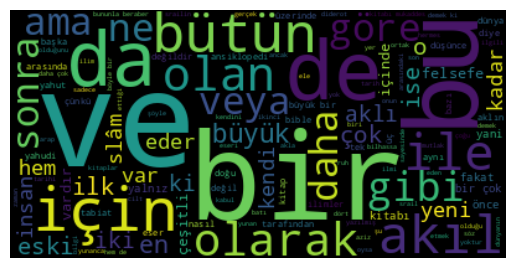

In [37]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

# Zipf Yasasına uygunluk

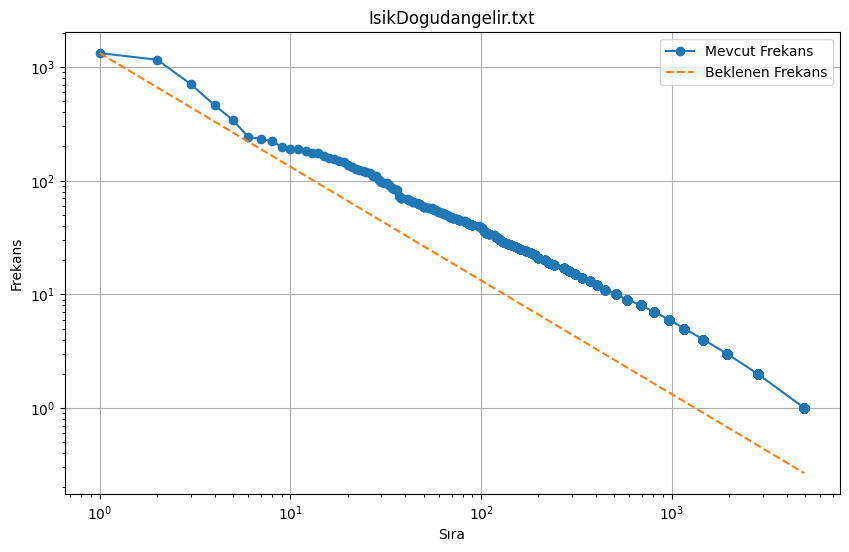

           Word  Frequency    Rank  Expected Frequency (Zipf)
0           bir       1326     1.0                1326.000000
1            ve       1160     2.0                 663.000000
2            bu        708     3.0                 442.000000
3            de        462     4.0                 331.500000
4            da        340     5.0                 265.200000
...         ...        ...     ...                        ...
15904   cezayir          1  4960.0                   0.267339
15905    nassif          1  4960.0                   0.267339
15906    sensee          1  4960.0                   0.267339
15907  realiste          1  4960.0                   0.267339
15908      dibn          1  4960.0                   0.267339

[15909 rows x 4 columns]


In [38]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Metin dosyasını oku
with open(dosyaAdi, 'r', encoding='utf-8') as file:
    text = file.read().lower()

# Noktalama işaretlerini temizle ve kelimeleri ayır
import string
translator = str.maketrans('', '', string.punctuation)
text = text.translate(translator)
words = text.split()

# Kelime frekanslarını say
word_counts = Counter(words)

# Frekanslara göre sırala
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# DataFrame'e çevir
df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Frequency'])

# Rank sütunu ekle
df['Rank'] = df['Frequency'].rank(ascending=False, method='min')

# Zipf yasasına uygunluğu kontrol etmek için bir sütun ekle (ideal frekans = en yüksek frekans / rank)
df['Expected Frequency (Zipf)'] = df['Frequency'].max() / df['Rank']

# Veriyi görselleştir (Zipf yasasına uygunluk grafiği)
plt.figure(figsize=(10, 6))
plt.loglog(df['Rank'], df['Frequency'], label='Mevcut Frekans', marker='o')
plt.loglog(df['Rank'], df['Expected Frequency (Zipf)'], label='Beklenen Frekans', linestyle='--')
plt.xlabel('Sıra')
plt.ylabel('Frekans')
plt.title(dosyaAdi)
plt.legend()
plt.grid(True)
plt.show()

# Tabloyu görüntüle
print(df)
